# Predicting Hepatitis C

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

/Users/buddhi/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## Loading up the data

In [2]:
df = pd.read_csv("HepatitisCdata.csv")
df.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [3]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [4]:
df.dtypes

Category     object
Age           int64
Sex          object
ALB         float64
ALP         float64
ALT         float64
AST         float64
BIL         float64
CHE         float64
CHOL        float64
CREA        float64
GGT         float64
PROT        float64
dtype: object

In [5]:
df.Category.unique()

array(['0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis',
       '2=Fibrosis', '3=Cirrhosis'], dtype=object)

In [6]:
# Mapping numeric values

df['Category'] = df['Category'].map({'0=Blood Donor': 0, '0s=suspect Blood Donor': 0, 
                                     "1=Hepatitis" : 1, "2=Fibrosis" : 1, "3=Cirrhosis" : 1})

df['Sex'] = df['Sex'].map({'m': 1, 'f': 2})

In [7]:
df.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [8]:
# Checking the data types again after the transformation
df.dtypes

Category      int64
Age           int64
Sex           int64
ALB         float64
ALP         float64
ALT         float64
AST         float64
BIL         float64
CHE         float64
CHOL        float64
CREA        float64
GGT         float64
PROT        float64
dtype: object

In [9]:
# Checking for missing values in the dataset
df.isna().sum()

Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
dtype: int64

In [10]:
# Filling missing values with the median
df.fillna(df.median(), inplace=True)

In [11]:
df.isna().sum()

Category    0
Age         0
Sex         0
ALB         0
ALP         0
ALT         0
AST         0
BIL         0
CHE         0
CHOL        0
CREA        0
GGT         0
PROT        0
dtype: int64

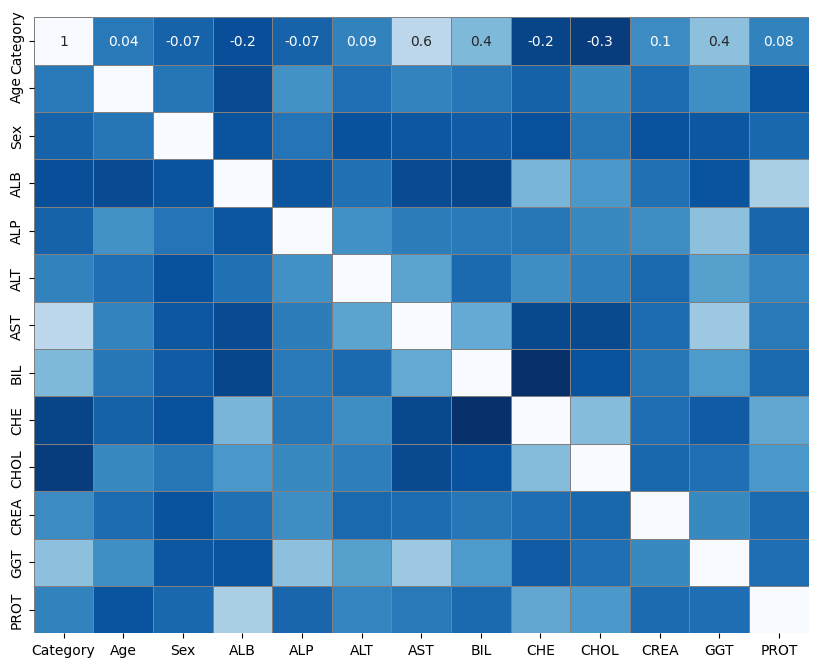

In [12]:
# Having a look at the correlation matrix

fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, fmt='.1g', cmap="Blues_r", cbar=False, linewidths=0.5, linecolor='grey');

In [13]:
print ('Total Suspected Patients : {} '.format(df.Category.value_counts()[0]))
print ('Total Healthy Patients : {} '.format(df.Category.value_counts()[1]))

Total Suspected Patients : 540 
Total Healthy Patients : 75 


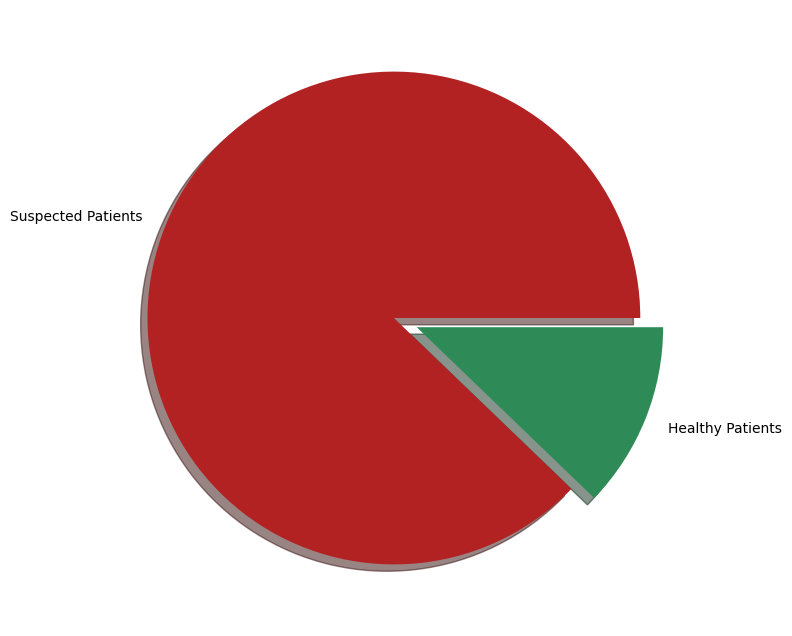

In [14]:
fig, ax = plt.subplots(figsize=(8,8))

plt.pie(x=df["Category"].value_counts(), 
        colors=["firebrick","seagreen"], 
        labels=["Suspected Patients","Healthy Patients"], 
        shadow = True, 
        explode = (0, 0.1)
        )

plt.show()

In [15]:
df.Sex.value_counts()

Sex
1    377
2    238
Name: count, dtype: int64

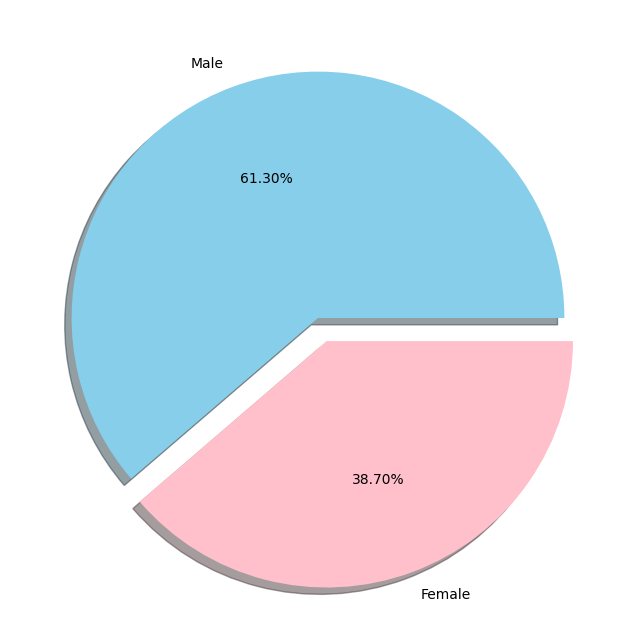

In [16]:
fig, ax = plt.subplots(figsize=(8,8))
plt.pie(x=df["Sex"].value_counts(), 
        colors=["skyblue","pink"], 
        labels=["Male","Female"], 
        shadow = True, 
        autopct="%1.2f%%", 
        explode = (0, 0.1)
        )
plt.show()

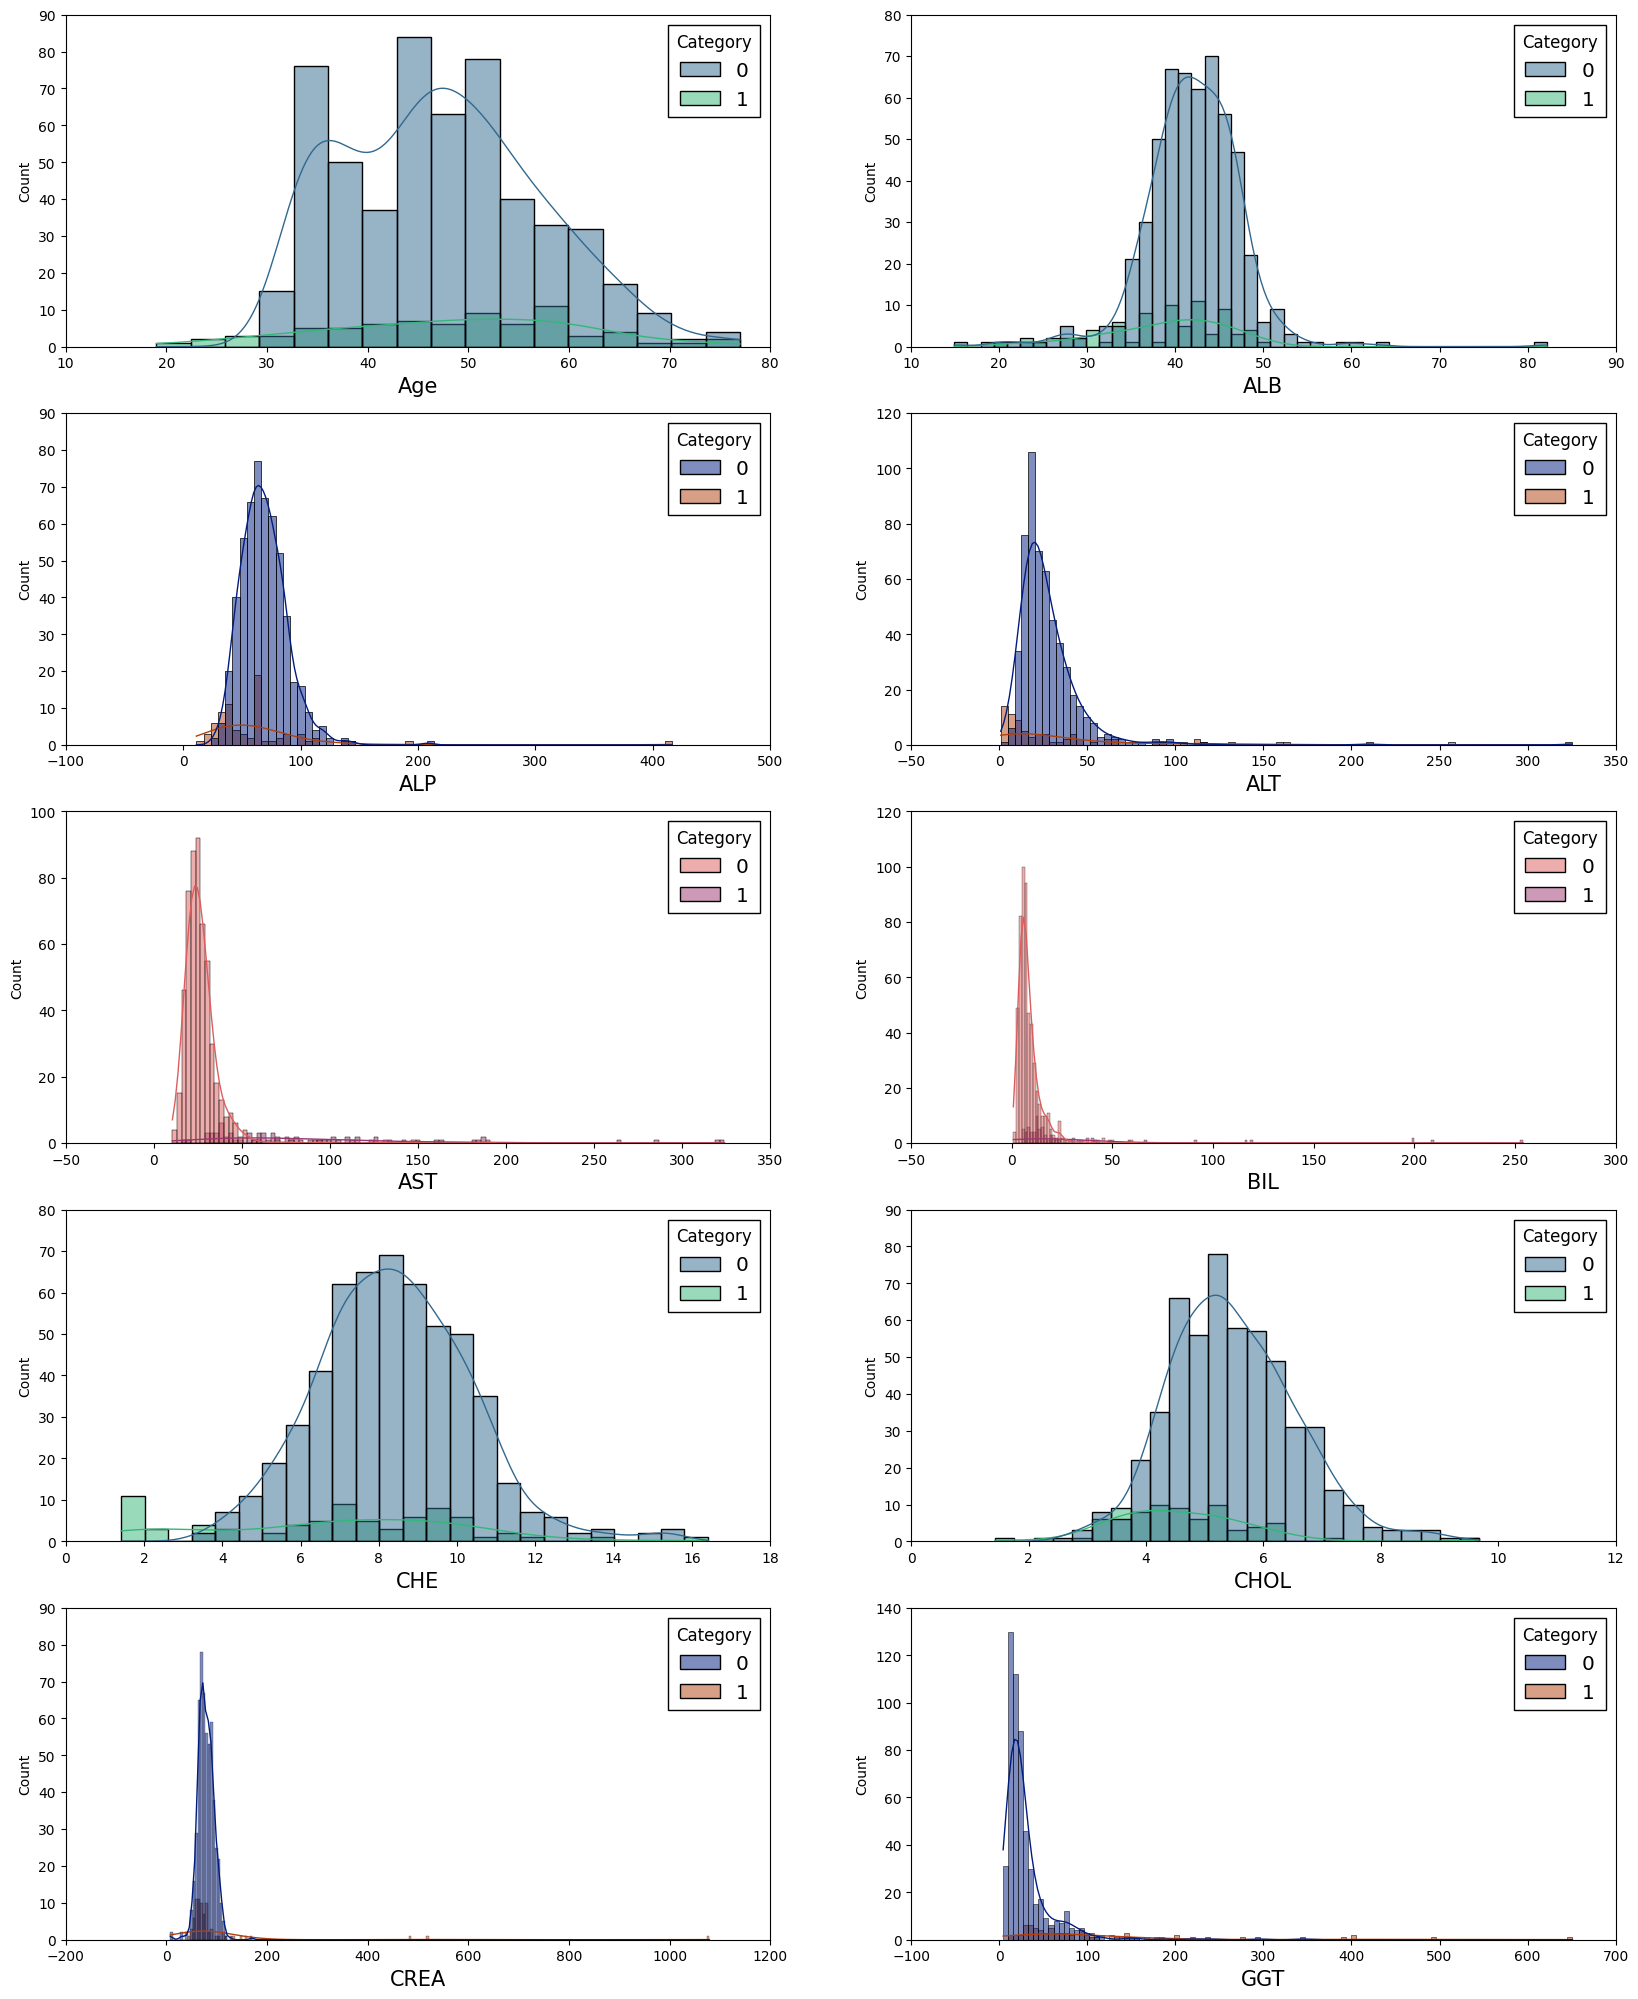

In [17]:
fig, ax =plt.subplots(5,2, figsize=(20,25)) 
plt.style.use("classic")


sns.histplot(x = df["Age"], hue = df["Category"], palette="viridis", kde=True, ax=ax[0,0]);
ax[0,0].set_xlabel("Age",fontsize=15)

sns.histplot(x = df["ALB"], hue = df["Category"], palette="viridis", kde=True, ax=ax[0,1]);
ax[0,1].set_xlabel("ALB",fontsize=15)


sns.histplot(x = df["ALP"], hue = df["Category"], palette="dark", kde=True, ax=ax[1,0]);
ax[1,0].set_xlabel("ALP",fontsize=15)

sns.histplot(x = df["ALT"], hue = df["Category"], palette="dark", kde=True, ax=ax[1,1]);
ax[1,1].set_xlabel("ALT",fontsize=15)


sns.histplot(x = df["AST"], hue = df["Category"], palette="flare", kde=True, ax=ax[2,0]);
ax[2,0].set_xlabel("AST",fontsize=15)

sns.histplot(x = df["BIL"], hue = df["Category"], palette="flare", kde=True, ax=ax[2,1]);
ax[2,1].set_xlabel("BIL",fontsize=15)


sns.histplot(x = df["CHE"], hue = df["Category"], palette="viridis", kde=True, ax=ax[3,0]);
ax[3,0].set_xlabel("CHE",fontsize=15)

sns.histplot(x = df["CHOL"], hue = df["Category"], palette="viridis", kde=True, ax=ax[3,1]);
ax[3,1].set_xlabel("CHOL",fontsize=15);


sns.histplot(x = df["CREA"], hue = df["Category"], palette="dark", kde=True, ax=ax[4,0]);
ax[4,0].set_xlabel("CREA",fontsize=15)

sns.histplot(x = df["GGT"], hue = df["Category"], palette="dark", kde=True, ax=ax[4,1]);
ax[4,1].set_xlabel("GGT",fontsize=15);

## Splitting the data into training and test datasets
Here, we are trying to predict whether the patient has Hepatitis C or not using the given data. Hence, the `Category` will be the y label and rest of the data will be the X or the input data.

In [18]:
# X data
X = df.drop("Category", axis=1)
X.head()

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [19]:
# y data
y = df["Category"]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Category, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
len(X_train), len(X_test)

(492, 123)

In [22]:
# Scaling the data 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## LogisticRegression

In [23]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [24]:
LogisticRegressionScore = lr.score(X_test, y_test)
print("Accuracy obtained by Logistic Regression model:",LogisticRegressionScore*100)

Accuracy obtained by Logistic Regression model: 88.6178861788618


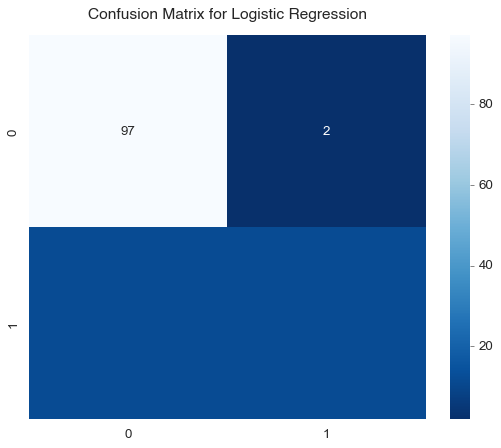

In [25]:
# Having a look at the confusion matrix for Logistic Regression

from sklearn.metrics import confusion_matrix, classification_report
sns.set_style("white")
y_pred_lr = lr.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cf_matrix, annot=True, cmap="Blues_r")
plt.title("Confusion Matrix for Logistic Regression", fontsize=14, fontname="Helvetica", y=1.03);

In [26]:
# Having a look at the classification report of Logistic Regression

from sklearn import metrics
print(metrics.classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93        99
           1       0.86      0.50      0.63        24

    accuracy                           0.89       123
   macro avg       0.87      0.74      0.78       123
weighted avg       0.88      0.89      0.87       123



## Random Forest Classifier

In [27]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [28]:
RandomForestClassifierScore = rfc.score(X_test,y_test)
print("Accacy obtained by Random Forest Classifier :", RandomForestClassifierScore*100)

Accacy obtained by Random Forest Classifier : 93.4959349593496


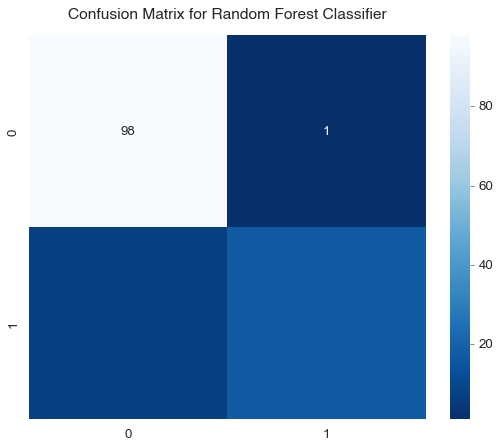

In [29]:
# Confusion Matrix of Random Forest Classifier

y_pred_rfc = rfc.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_rfc)
sns.heatmap(cf_matrix, annot=True, cmap="Blues_r")
plt.title("Confusion Matrix for Random Forest Classifier", fontsize=14, fontname="Helvetica", y=1.03);

In [30]:
print(metrics.classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96        99
           1       0.94      0.71      0.81        24

    accuracy                           0.93       123
   macro avg       0.94      0.85      0.89       123
weighted avg       0.94      0.93      0.93       123



## K Neighbors Classifier

In [31]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [32]:
KNeighborsClassifierScore = knn.score(X_test, y_test)
print("Accuracy obtained by K Neighbors Classifier :", KNeighborsClassifierScore*100)

Accuracy obtained by K Neighbors Classifier : 85.36585365853658


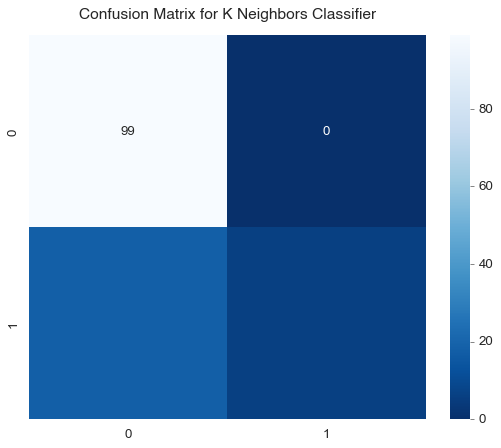

In [33]:
# Confustion Matrix 

y_pred_knn = knn.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cf_matrix, annot=True, cmap="Blues_r")
plt.title("Confusion Matrix for K Neighbors Classifier", fontsize=14, fontname="Helvetica", y=1.03);

In [34]:
print(metrics.classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92        99
           1       1.00      0.25      0.40        24

    accuracy                           0.85       123
   macro avg       0.92      0.62      0.66       123
weighted avg       0.88      0.85      0.82       123



## DecisionTreeClassifier

In [35]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [36]:
DecisionTreeClassifierScore = tree.score(X_test,y_test)
print("Accuracy obtained by Decision Tree Classifier :", DecisionTreeClassifierScore*100)

Accuracy obtained by Decision Tree Classifier : 91.05691056910568


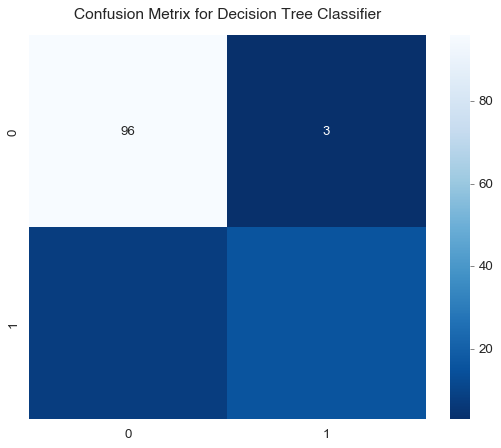

In [37]:
y_pred_tree = tree.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_tree)
sns.heatmap(cf_matrix, annot=True, cmap="Blues_r")
plt.title("Confusion Metrix for Decision Tree Classifier", fontsize=14, fontname="Helvetica", y=1.03);

In [38]:
print(metrics.classification_report(y_test, y_pred_tree));

              precision    recall  f1-score   support

           0       0.92      0.97      0.95        99
           1       0.84      0.67      0.74        24

    accuracy                           0.91       123
   macro avg       0.88      0.82      0.84       123
weighted avg       0.91      0.91      0.91       123



## CatBoost Classifier

In [39]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier(iterations=10)
cat.fit(X_train, y_train);

Learning rate set to 0.5
0:	learn: 0.4056594	total: 60.3ms	remaining: 543ms
1:	learn: 0.3052358	total: 61.2ms	remaining: 245ms
2:	learn: 0.2281643	total: 62.6ms	remaining: 146ms
3:	learn: 0.1874827	total: 63.5ms	remaining: 95.3ms
4:	learn: 0.1540611	total: 64.3ms	remaining: 64.3ms
5:	learn: 0.1302461	total: 65.2ms	remaining: 43.5ms
6:	learn: 0.1100836	total: 66.1ms	remaining: 28.3ms
7:	learn: 0.0993443	total: 66.9ms	remaining: 16.7ms
8:	learn: 0.0894244	total: 67.7ms	remaining: 7.52ms
9:	learn: 0.0820818	total: 68.4ms	remaining: 0us


In [40]:
CatBoostClassifierScore = cat.score(X_test,y_test)
print("Accuracy obtained by CatBoost Classifier model:",CatBoostClassifierScore*100)

Accuracy obtained by CatBoost Classifier model: 91.869918699187


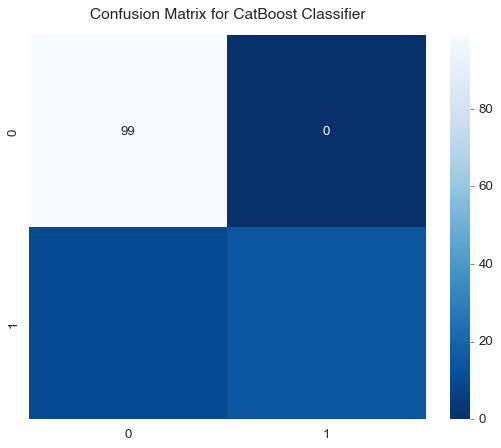

In [41]:
# Confusion matrix
y_pred_cat = cat.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_cat)
sns.heatmap(cf_matrix, annot=True, cmap="Blues_r")
plt.title("Confusion Matrix for CatBoost Classifier", fontsize=14, fontname="Helvetica", y=1.03);

In [42]:
# Classification Report of CatBoost Classifier

print(metrics.classification_report(y_test, y_pred_cat))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        99
           1       1.00      0.58      0.74        24

    accuracy                           0.92       123
   macro avg       0.95      0.79      0.84       123
weighted avg       0.93      0.92      0.91       123



## Gradient Boosting Classifier

In [43]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [44]:
GradientBoostingClassifierScore = gb.score(X_test,y_test)
print("Accuracy obtained by Gradient Boosting Classifier model:",GradientBoostingClassifierScore*100)

Accuracy obtained by Gradient Boosting Classifier model: 94.3089430894309


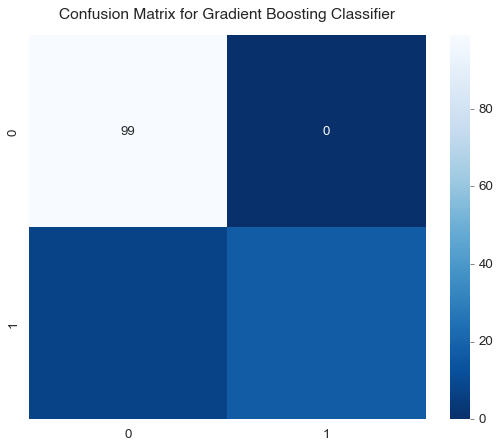

In [45]:
# Confusion matrix
y_pred_gb = gb.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred_gb)
sns.heatmap(cf_matrix, annot=True, cmap="Blues_r")
plt.title("Confusion Matrix for Gradient Boosting Classifier", fontsize=14, fontname="Helvetica", y=1.03);

In [46]:
# Classification Report of Gradient Boosting Classifier

print(metrics.classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        99
           1       1.00      0.71      0.83        24

    accuracy                           0.94       123
   macro avg       0.97      0.85      0.90       123
weighted avg       0.95      0.94      0.94       123



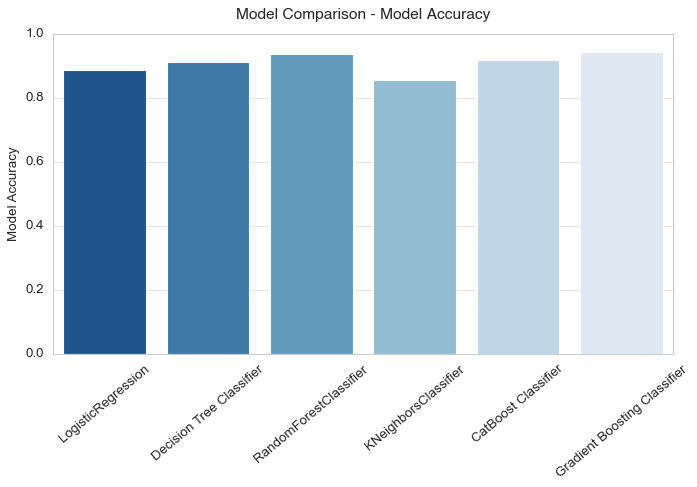

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style directly
sns.set_style("whitegrid")

x = ["LogisticRegression", 
     "Decision Tree Classifier", 
     "RandomForestClassifier", 
     "KNeighborsClassifier", 
     "CatBoost Classifier", 
     "Gradient Boosting Classifier"]

y = [LogisticRegressionScore, 
     DecisionTreeClassifierScore, 
     RandomForestClassifierScore, 
     KNeighborsClassifierScore, 
     CatBoostClassifierScore, 
     GradientBoostingClassifierScore]

fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x=x, y=y, palette="Blues_r")
plt.ylabel("Model Accuracy")
plt.xticks(rotation=40)
plt.title("Model Comparison - Model Accuracy", fontsize=14, fontname="Helvetica", y=1.03)
plt.show()


* `Gradient Boosting Classifier` and `Random Forest Regression` perform best on the test set.

## Hyperparameter Tuning on Random Forest Classifier

In [48]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'criterion' : ['gini', 'entropy'],
    'n_estimators': [100, 200, 300, 1000]
}

grid_search_rfc = GridSearchCV(estimator = rfc, 
                           param_grid = param_grid, 
                           cv = 3, n_jobs = -1, verbose = 2)

In [49]:
grid_search_rfc.fit(X_train, y_train)

Fitting 3 folds for each of 576 candidates, totalling 1728 fits


/Users/buddhi/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/buddhi/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/buddhi/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/buddhi/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/buddhi/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas re

[CV] END bootstrap=True, criterion=gini, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time=   1.1s
[CV] END bootstrap=True, criterion=gini, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   0.6s
[CV] END bootstrap=True, criterion=gini, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   0.9s
[CV] END bootstrap=True, criterion=gini, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, criterion=gini, max_depth=80, max_features=2, min_samples_leaf=3, min_samples

[CV] END bootstrap=True, criterion=gini, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, criterion=gini, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1000; total time=   3.0s
[CV] END bootstrap=True, criterion=gini, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=300; total time=   0.8s
[CV] END bootstrap=True, criterion=gini, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1000; total time=   3.0s
[CV] END bootstrap=True, criterion=gini, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   2.9s
[CV] END bootstrap=True, criterion=gini, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=300; total time=   0.8s
[CV] END bootstrap=True, criterion=gini, max_depth=80, max_features=2, min_samples_leaf=5, min_sampl

[CV] END bootstrap=True, criterion=gini, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.7s
[CV] END bootstrap=True, criterion=gini, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1000; total time=   2.9s
[CV] END bootstrap=True, criterion=gini, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1000; total time=   2.7s
[CV] END bootstrap=True, criterion=gini, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.7s
[CV] END bootstrap=True, criterion=gini, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   1.0s
[CV] END bootstrap=True, criterion=gini, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=80, max_features=2, min_samples_leaf=4, min_sampl

[CV] END bootstrap=True, criterion=gini, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1000; total time=   3.0s
[CV] END bootstrap=True, criterion=gini, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, criterion=gini, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1000; total time=   2.8s
[CV] END bootstrap=True, criterion=gini, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.7s
[CV] END bootstrap=True, criterion=gini, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   2.7s
[CV] END bootstrap=True, criterion=gini, max_depth=80, max_features=2, min_samples_leaf=5, min_samp

[CV] END bootstrap=True, criterion=gini, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.7s
[CV] END bootstrap=True, criterion=gini, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   0.9s
[CV] END bootstrap=True, criterion=gini, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=80, max_features=2, min_samples_leaf=3, min_sample

[CV] END bootstrap=True, criterion=gini, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time=   1.1s
[CV] END bootstrap=True, criterion=gini, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   0.6s
[CV] END bootstrap=True, criterion=gini, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   2.8s
[CV] END bootstrap=True, criterion=gini, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   0.6s
[CV] END bootstrap=True, criterion=gini, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=300; total time=   0.8s
[CV] END bootstrap=True, criterion=gini, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.4s
[CV] END bootstrap=True, criterion=gini, max_depth=80, max_features=2, min_samples_leaf=4, min_samples

[CV] END bootstrap=True, criterion=gini, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time=   1.1s
[CV] END bootstrap=True, criterion=gini, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   0.6s
[CV] END bootstrap=True, criterion=gini, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   2.8s
[CV] END bootstrap=True, criterion=gini, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=300; total time=   0.6s
[CV] END bootstrap=True, criterion=gini, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1000; total time=   3.0s
[CV] END bootstrap=True, criterion=gini, max_depth=80, max_features=2, min_samples_leaf=4, min_samples

[CV] END bootstrap=True, criterion=gini, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.8s
[CV] END bootstrap=True, criterion=gini, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   0.9s
[CV] END bootstrap=True, criterion=gini, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   3.0s
[CV] END bootstrap=True, criterion=gini, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=300; total time=   0.8s
[CV] END bootstrap=True, criterion=gini, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=80, max_features=2, min_samples_leaf=4, min_sample

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             verbose=2)

In [50]:
grid_search_rfc.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 80,
 'max_features': 2,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 300}

In [51]:
grid_search_rfc.best_score_

0.9715447154471545

In [52]:
grid_search_rfc_predict = grid_search_rfc.predict(X_test)

In [53]:
print('Improvement in Random Forest Classifier after GridSearchCV: {:0.2f}%.'.format(100 * (grid_search_rfc.best_score_ - RandomForestClassifierScore) / RandomForestClassifierScore))

Improvement in Random Forest Classifier after GridSearchCV: 3.91%.


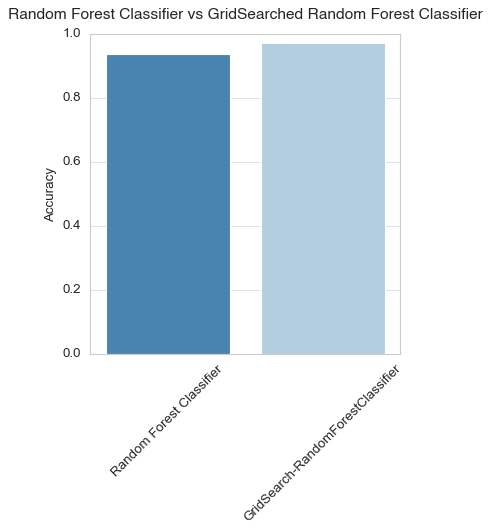

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")  # Set Seaborn style directly

x = ["Random Forest Classifier",  
     "GridSearch-RandomForestClassifier"]
 
y = [RandomForestClassifierScore,  
     grid_search_rfc.best_score_]

fig, ax = plt.subplots(figsize=(5,5))
sns.barplot(x=x,y=y, palette="Blues_r");
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.title("Random Forest Classifier vs GridSearched Random Forest Classifier", fontsize=14, fontname="Helvetica", y=1.03);
plt.show()


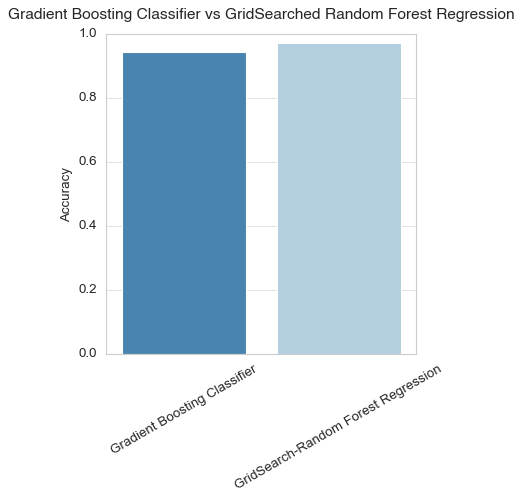

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")  # Set Seaborn style directly

x = ["Gradient Boosting Classifier",
     "GridSearch-Random Forest Regression"]

y = [GradientBoostingClassifierScore,
     grid_search_rfc.best_score_]

fig, ax = plt.subplots(figsize=(5,5))
sns.barplot(x=x, y=y, palette="Blues_r")
plt.ylabel("Accuracy")
plt.xticks(rotation=30)
plt.title("Gradient Boosting Classifier vs GridSearched Random Forest Regression", fontsize=14, fontname="Helvetica", y=1.03)
plt.show()


### After Hyperparameter tuning, the Random Forest Regression model performs better than the Gradient Boosting Classifier which was not the case before!

In [56]:
# Classification Report of GridSearch-RandomForestRegression

print(classification_report(y_test, grid_search_rfc_predict))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95        99
           1       0.94      0.62      0.75        24

    accuracy                           0.92       123
   macro avg       0.93      0.81      0.85       123
weighted avg       0.92      0.92      0.91       123



In [57]:
# Assuming you've selected the Random Forest Classifier as your final model

# Sample data (assuming it's a pandas DataFrame with the same columns as your training data)
sample_data = pd.DataFrame({
    'Age': [34],
    'Sex': [1],
    'ALB': [42.6],
    'ALP': [27],
    'ALT': [21.4],
    'AST': [21.7],
    'BIL': [7.2],
    'CHE': [8.15],
    'CHOL': [6.79],
    'CREA': [85],
    'GGT': [13.9],
    'PROT': [67.7]
})

# Assuming you've already scaled your training data using the same scaler
sample_data_scaled = scaler.transform(sample_data)

# Predict using the trained Random Forest Classifier
predicted_category = rfc.predict(sample_data_scaled)

# Print the predicted category
print("Predicted Category:", predicted_category)


Predicted Category: [0]


In [58]:
import joblib
joblib.dump(rfc, "hepmodel.pkl")

['hepmodel.pkl']

[CV] END bootstrap=True, criterion=entropy, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1000; total time=   1.9s
[CV] END bootstrap=True, criterion=entropy, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, criterion=entropy, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1000; total time=   2.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=80, max_features=2, min_samp

[CV] END bootstrap=True, criterion=gini, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=300; total time=   0.6s
[CV] END bootstrap=True, criterion=gini, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1000; total time=   2.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   1.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, criterion=entropy, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=200; total time=   0.6s
[CV] END bootstrap=True, criterion=entropy, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=300; total time=   0.9s
[CV] END bootstrap=True, criterion=entropy, max_depth=80, max_features=2, min_samples

[CV] END bootstrap=True, criterion=gini, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   2.3s
[CV] END bootstrap=True, criterion=gini, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, criterion=gini, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time=   0.7s
[CV] END bootstrap=True, criterion=gini, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, criterion=gini, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   2.2s
[CV] END bootstrap=True, criterion=gini, max_depth=110, max_features=3, min_samples_leaf=4, mi

[CV] END bootstrap=True, criterion=gini, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1000; total time=   2.3s
[CV] END bootstrap=True, criterion=gini, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, criterion=gini, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1000; total time=   2.4s
[CV] END bootstrap=True, criterion=gini, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   0.7s
[CV] END bootstrap=True, criterion=gini, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   2.2s
[CV] END bootstrap=True, criterion=entropy, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time=   0.6s
[CV] END bootstrap=True, criterion=entropy, max_depth=80, max_features=2, min_samples_leaf=

[CV] END bootstrap=True, criterion=entropy, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time=   0.6s
[CV] END bootstrap=True, criterion=entropy, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, criterion=entropy, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   3.5s
[CV] END bootstrap=True, criterion=entropy, max_depth=80, max_features=2, min_sampl